##  K-Means

K-Means is a centroid-based, unsupervised machine learning algorithm used for clustering data into K distinct groups. It minimizes the variance within each cluster by iteratively updating centroids and reassigning data points.


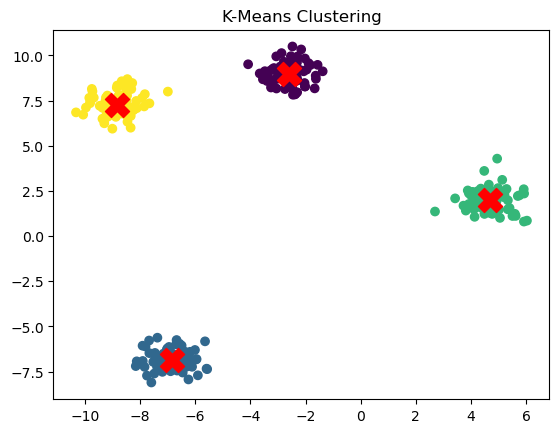

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs

# Create synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means Clustering")
plt.show()


##  How K-Means Works

K-Means follows a simple iterative process:
1. Choose K initial centroids (randomly or using K-Means++),
2. Assign each data point to the nearest centroid,
3. Recalculate centroids,
4. Repeat steps 2–3 until convergence.


##  Choosing the Right Number of Clusters (K)

To select an optimal K value, we use:
- **Elbow Method**
- **Silhouette Score**
- **Gap Statistics**


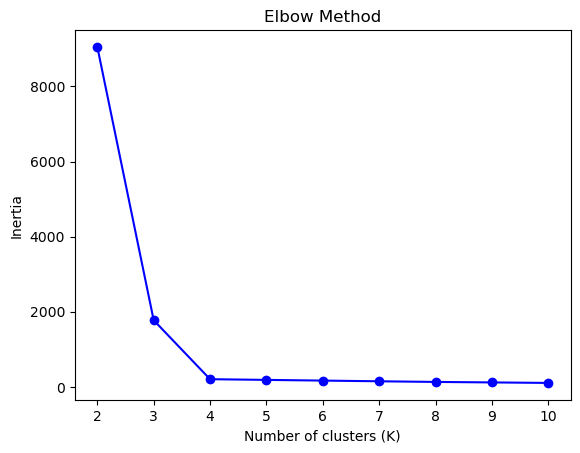

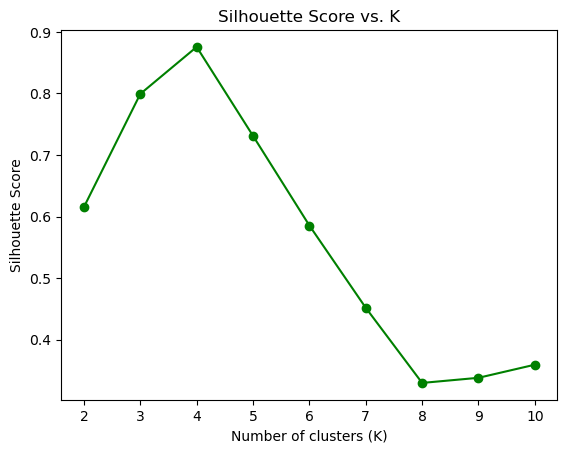

In [7]:
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []

K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X, model.labels_))

# Plot Elbow
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Plot Silhouette Score
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. K')
plt.show()


## Understanding Inertia and Silhouette Score

- **Inertia**: Sum of squared distances between points and their closest centroid. Lower is better.
- **Silhouette Score**: How well a point fits into its assigned cluster vs. the nearest other cluster. Ranges from -1 to 1.


##  K-Means++ Initialization

K-Means++ improves the initial selection of centroids to avoid poor clustering results. It's the default initialization in Scikit-Learn.


In [11]:
# Using KMeans++ (default)
model_pp = KMeans(n_clusters=4, init='k-means++', random_state=42)
model_pp.fit(X)


KMeans(n_clusters=4, random_state=42)

##  Dealing with Outliers in K-Means

K-Means is sensitive to outliers as it tries to minimize squared distances. Use methods like:
- Preprocessing (e.g., z-score filtering)
- DBSCAN for outlier detection
- Robust Scalers


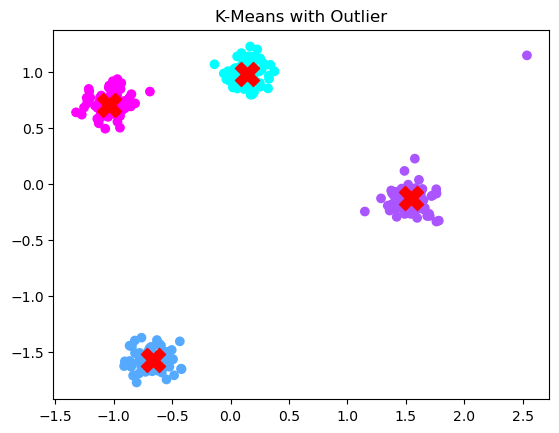

In [14]:
from sklearn.preprocessing import StandardScaler

# Add an outlier
X_outlier = np.vstack([X, [10, 10]])

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlier)

# Fit K-Means
model = KMeans(n_clusters=4, random_state=42)
model.fit(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=model.labels_, cmap='cool')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means with Outlier")
plt.show()


##  Clustering on High-Dimensional Data

High-dimensional data can distort distance metrics. Use dimensionality reduction (PCA, t-SNE) before clustering.


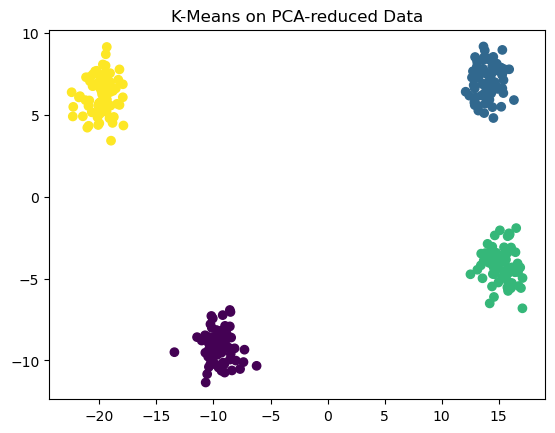

In [19]:
from sklearn.decomposition import PCA

# Simulate high-dimensional data
X_hd, _ = make_blobs(n_samples=300, centers=4, n_features=10, random_state=42)

# Reduce with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_hd)

# Apply K-Means
model = KMeans(n_clusters=4, random_state=42)
model.fit(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap='viridis')
plt.title("K-Means on PCA-reduced Data")
plt.show()


##  Comparison with DBSCAN

| Feature           | K-Means         | DBSCAN          |
|------------------|------------------|------------------|
| Requires K?       | Yes              | No               |
| Outlier Handling  | Poor             | Excellent        |
| Shape Sensitivity| Poor (spherical) | Arbitrary shapes |

Use DBSCAN when clusters are of arbitrary shapes or noise is high.


##  Use Cases of K-Means

- Customer segmentation
- Image compression
- Market basket analysis
- Social network grouping


##  K-Means vs DBSCAN Visual Comparison

In this example, we test both algorithms on a **non-linear (curved)** dataset. K-Means struggles to correctly separate the clusters, while DBSCAN adapts well to the underlying structure.

- **K-Means:** Assumes spherical clusters; struggles with complex shapes.
- **DBSCAN:** Density-based clustering allows detection of arbitrarily shaped clusters and noise.


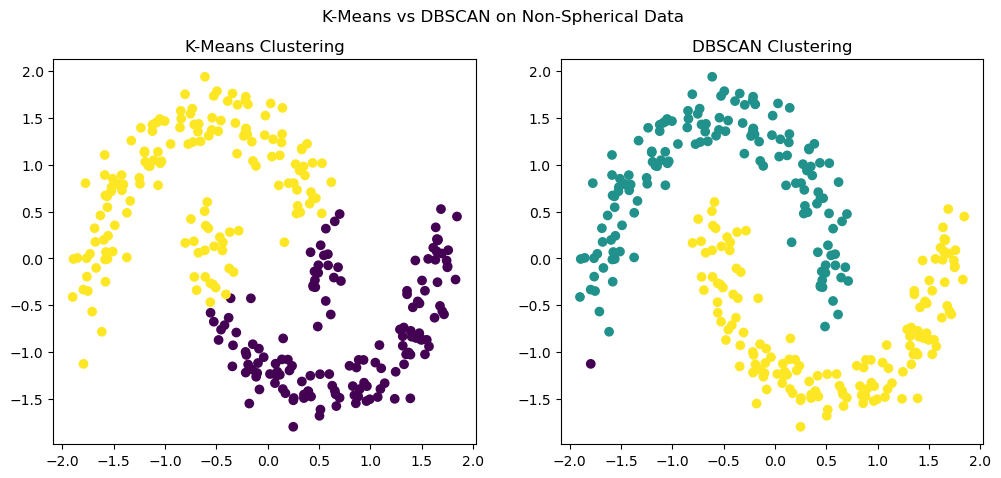

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate dataset with curved shapes
X, _ = make_moons(n_samples=300, noise=0.1)
X = StandardScaler().fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
axes[0].set_title("K-Means Clustering")

axes[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
axes[1].set_title("DBSCAN Clustering")

plt.suptitle("K-Means vs DBSCAN on Non-Spherical Data")
plt.show()


# Silhouette Score Evaluation

The Silhouette Score is a metric to evaluate how well clusters are separated. It ranges from -1 to 1; closer to 1 means better-defined clusters. For DBSCAN, noise points are excluded before calculation.


In [39]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
X = StandardScaler().fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, kmeans_labels)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Exclude noise points for DBSCAN silhouette score
mask = dbscan_labels != -1
if np.any(mask):
    silhouette_dbscan = silhouette_score(X[mask], dbscan_labels[mask])
else:
    silhouette_dbscan = -1  # All points are noise

print(f"K-Means Silhouette Score: {silhouette_kmeans:.3f}")
print(f"DBSCAN Silhouette Score (noise excluded): {silhouette_dbscan:.3f}")


K-Means Silhouette Score: 0.880
DBSCAN Silhouette Score (noise excluded): 0.880


# Time Complexity Comparison
We measure the time taken by each algorithm on a large dataset to understand their computational performance.

In [43]:
import time
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate large synthetic data
X, _ = make_blobs(n_samples=10000, centers=5, cluster_std=1.0, random_state=42)
X = StandardScaler().fit_transform(X)

# Measure K-Means time
start_time = time.time()
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
kmeans_duration = time.time() - start_time

# Measure DBSCAN time
start_time = time.time()
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
dbscan_duration = time.time() - start_time

print(f"K-Means time: {kmeans_duration:.4f} seconds")
print(f"DBSCAN time: {dbscan_duration:.4f} seconds")


K-Means time: 0.0361 seconds
DBSCAN time: 0.2884 seconds


# Performance on Noisy and Large Datasets

This example shows how both algorithms handle a large dataset with added noise points.


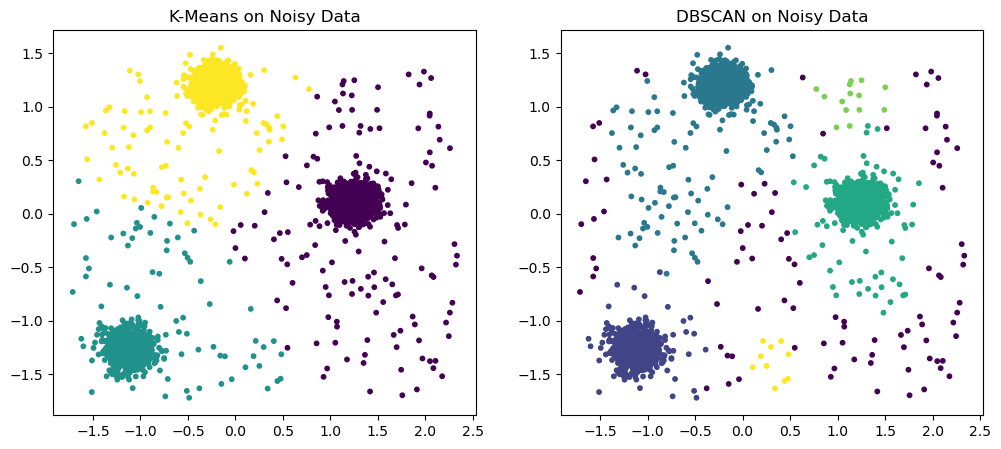

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Create data with clusters
X, _ = make_blobs(n_samples=3000, centers=3, cluster_std=0.60, random_state=42)

# Add uniform random noise
noise = np.random.uniform(low=-10, high=10, size=(300, 2))
X_noisy = np.vstack([X, noise])
X_noisy = StandardScaler().fit_transform(X_noisy)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_noisy)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_noisy)

# Plot K-Means results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("K-Means on Noisy Data")

# Plot DBSCAN results
plt.subplot(1,2,2)
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title("DBSCAN on Noisy Data")

plt.show()


# Application on Real-World Datasets
We apply both algorithms on the popular Iris dataset for practical clustering comparison.

In [49]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Load Iris dataset
data = load_iris()
X = data.data
X = StandardScaler().fit_transform(X)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, kmeans_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

mask = dbscan_labels != -1
if np.any(mask):
    silhouette_dbscan = silhouette_score(X[mask], dbscan_labels[mask])
else:
    silhouette_dbscan = -1

print(f"K-Means Silhouette Score: {silhouette_kmeans:.3f}")
print(f"DBSCAN Silhouette Score (noise excluded): {silhouette_dbscan:.3f}")


K-Means Silhouette Score: 0.480
DBSCAN Silhouette Score (noise excluded): 0.642


# Parameter Sensitivity Analysis
Shows how varying DBSCAN’s eps and K-Means’ k affect clustering.

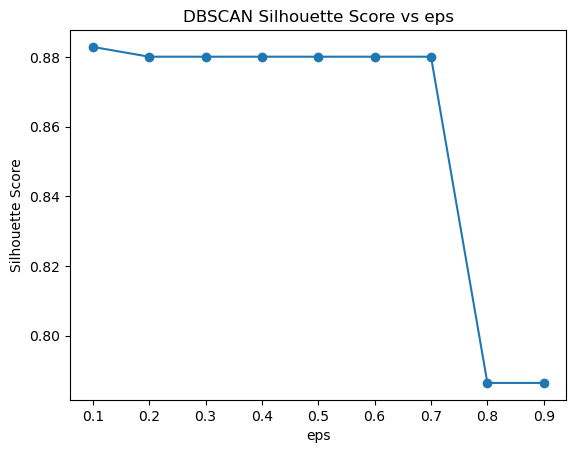

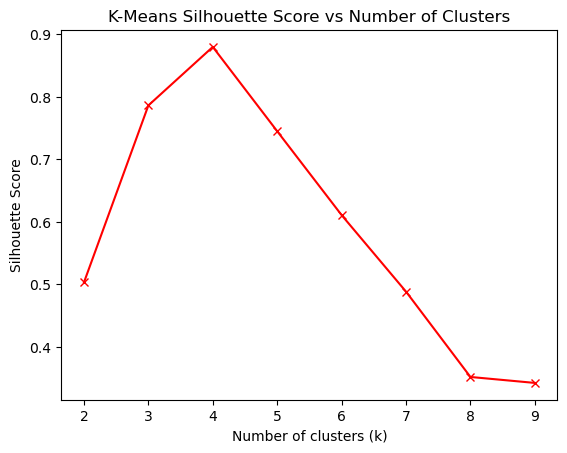

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)
X = StandardScaler().fit_transform(X)

# DBSCAN: Vary eps
eps_values = np.arange(0.1, 1.0, 0.1)
dbscan_scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    mask = labels != -1
    if np.any(mask):
        score = silhouette_score(X[mask], labels[mask])
    else:
        score = -1
    dbscan_scores.append(score)

plt.plot(eps_values, dbscan_scores, marker='o')
plt.title("DBSCAN Silhouette Score vs eps")
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.show()

# KMeans: Vary number of clusters k
k_values = range(2, 10)
kmeans_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    kmeans_scores.append(score)

plt.plot(k_values, kmeans_scores, marker='x', color='red')
plt.title("K-Means Silhouette Score vs Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


# Automated Parameter Tuning
Example of automated parameter tuning using the KneeLocator to select the elbow point for K-Means.


In [57]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


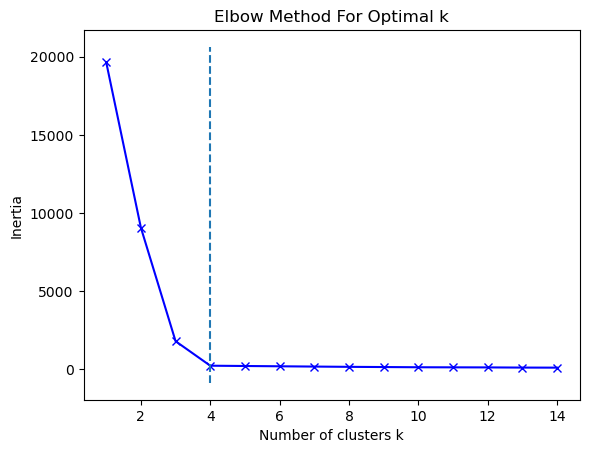

Optimal number of clusters according to elbow method: 4


In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

inertia = []
k_values = range(1, 15)
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

# Use KneeLocator to find elbow
kl = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
optimal_k = kl.elbow

plt.plot(k_values, inertia, 'bx-')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

print(f"Optimal number of clusters according to elbow method: {optimal_k}")


---

##  Contact

Thank you for exploring this notebook on **DBSCAN and K-Means – Advanced Concepts**.  
If you'd like to connect, collaborate, or have any questions, please feel free to reach out via the following channels:

- **Name:** Mahmut Esat Kolay – Candidate Computer Engineering  
-  [LinkedIn](https://www.linkedin.com/in/mahmutesatkolay)  
-  [GitHub](https://github.com/MEK-0)  
-  **Email:** esat.kolay19@gmail.com

---

*This notebook is part of my ongoing journey into Machine Learning and Unsupervised Clustering techniques. Stay tuned for more tutorials, projects, and insights!*
